# HR Analytics Project- Understanding the Attrition in HR

# Problem statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing the required libraries

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [4]:
# Loading the dataset
df=pd.read_csv(r'C:\Users\Asus\Desktop\dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


It is observed that the dataset has 1470 rows and 35 columns.

# Data Analysis:

In [5]:
# Checking the columns present
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Checking for null values in the dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values present in the dataset

In [7]:
# Checking the information from the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Using this method we can find the type of data and we can say that most of our data are in integer

In [8]:
#Checking the description of statistical data 
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the above data it is observed that there is no missing data as every columns have same count (1470) And maybe columns like Monthlyincome, Totalworkingyears,YearsAtCompany,YearsinCurrentRole,YearSinceLastPromotion,YearWithCurrManager has huge differece in their 75 % and 100% so they must have some amount of outlier that is need to be treated.

In [9]:
# Dropping the columns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [10]:
# Finding out the rows and columns in a dataframe
df.shape

(1470, 31)

In [11]:
#splitting the objext type colums and grouping them in a list
object_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatypes.append(x)
object_datatypes   

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

all the columns are having object type datatype and these are 8 in numbers.

In [12]:
integer_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
      integer_datatypes.append(x)
integer_datatypes    

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

23 columns are holding integer datatype

In [13]:
df.nunique().to_frame("Unique values")

,Unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EnvironmentSatisfaction,4
Gender,2


In [14]:
for col in object_datatypes:
    print(col)
    print(df[col].value_counts())
    print("="*80)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender
Male      882
Female    588
Name: Gender, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtyp

# Visualization of the dataset

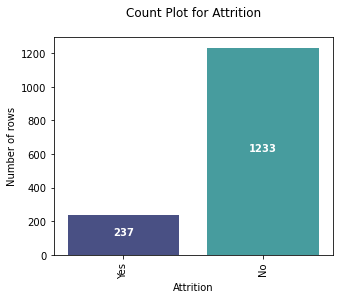

In [15]:
plt.figure(figsize=(5,4))
col_name = 'Attrition'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

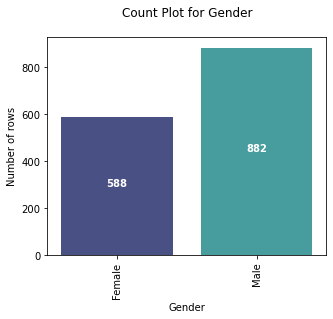

In [16]:
plt.figure(figsize=(5,4))
col_name = 'Gender'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

here we can see the count of Male is more than that of female.

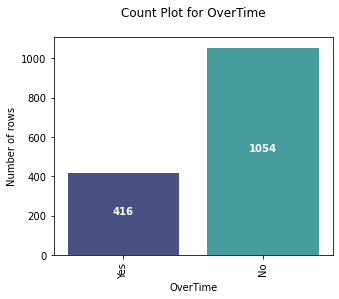

In [17]:
plt.figure(figsize=(5,4))
col_name = 'OverTime'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

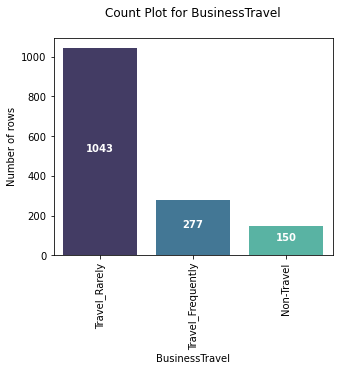

In [18]:
plt.figure(figsize=(5,4))
col_name = 'BusinessTravel'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

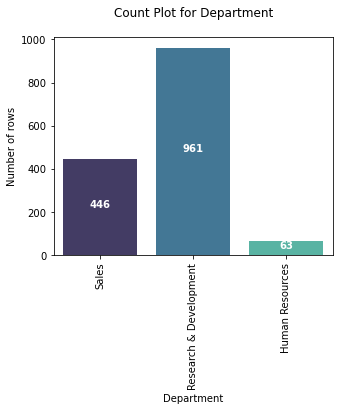

In [19]:
plt.figure(figsize=(5,4))
col_name = 'Department'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

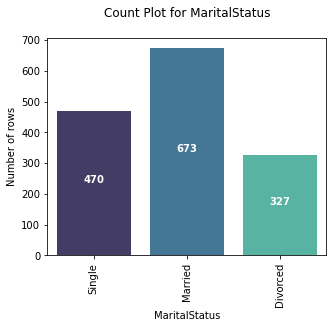

In [20]:
plt.figure(figsize=(5,4))
col_name = 'MaritalStatus'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

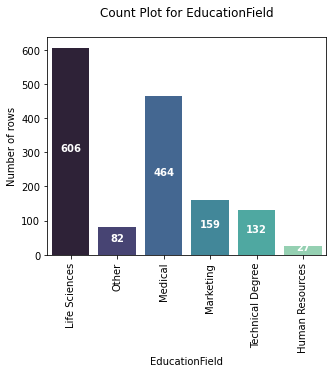

In [21]:
plt.figure(figsize=(5,4))
col_name = 'EducationField'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

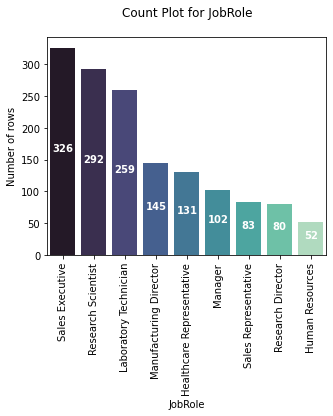

In [22]:
plt.figure(figsize=(5,4))
col_name = 'JobRole'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

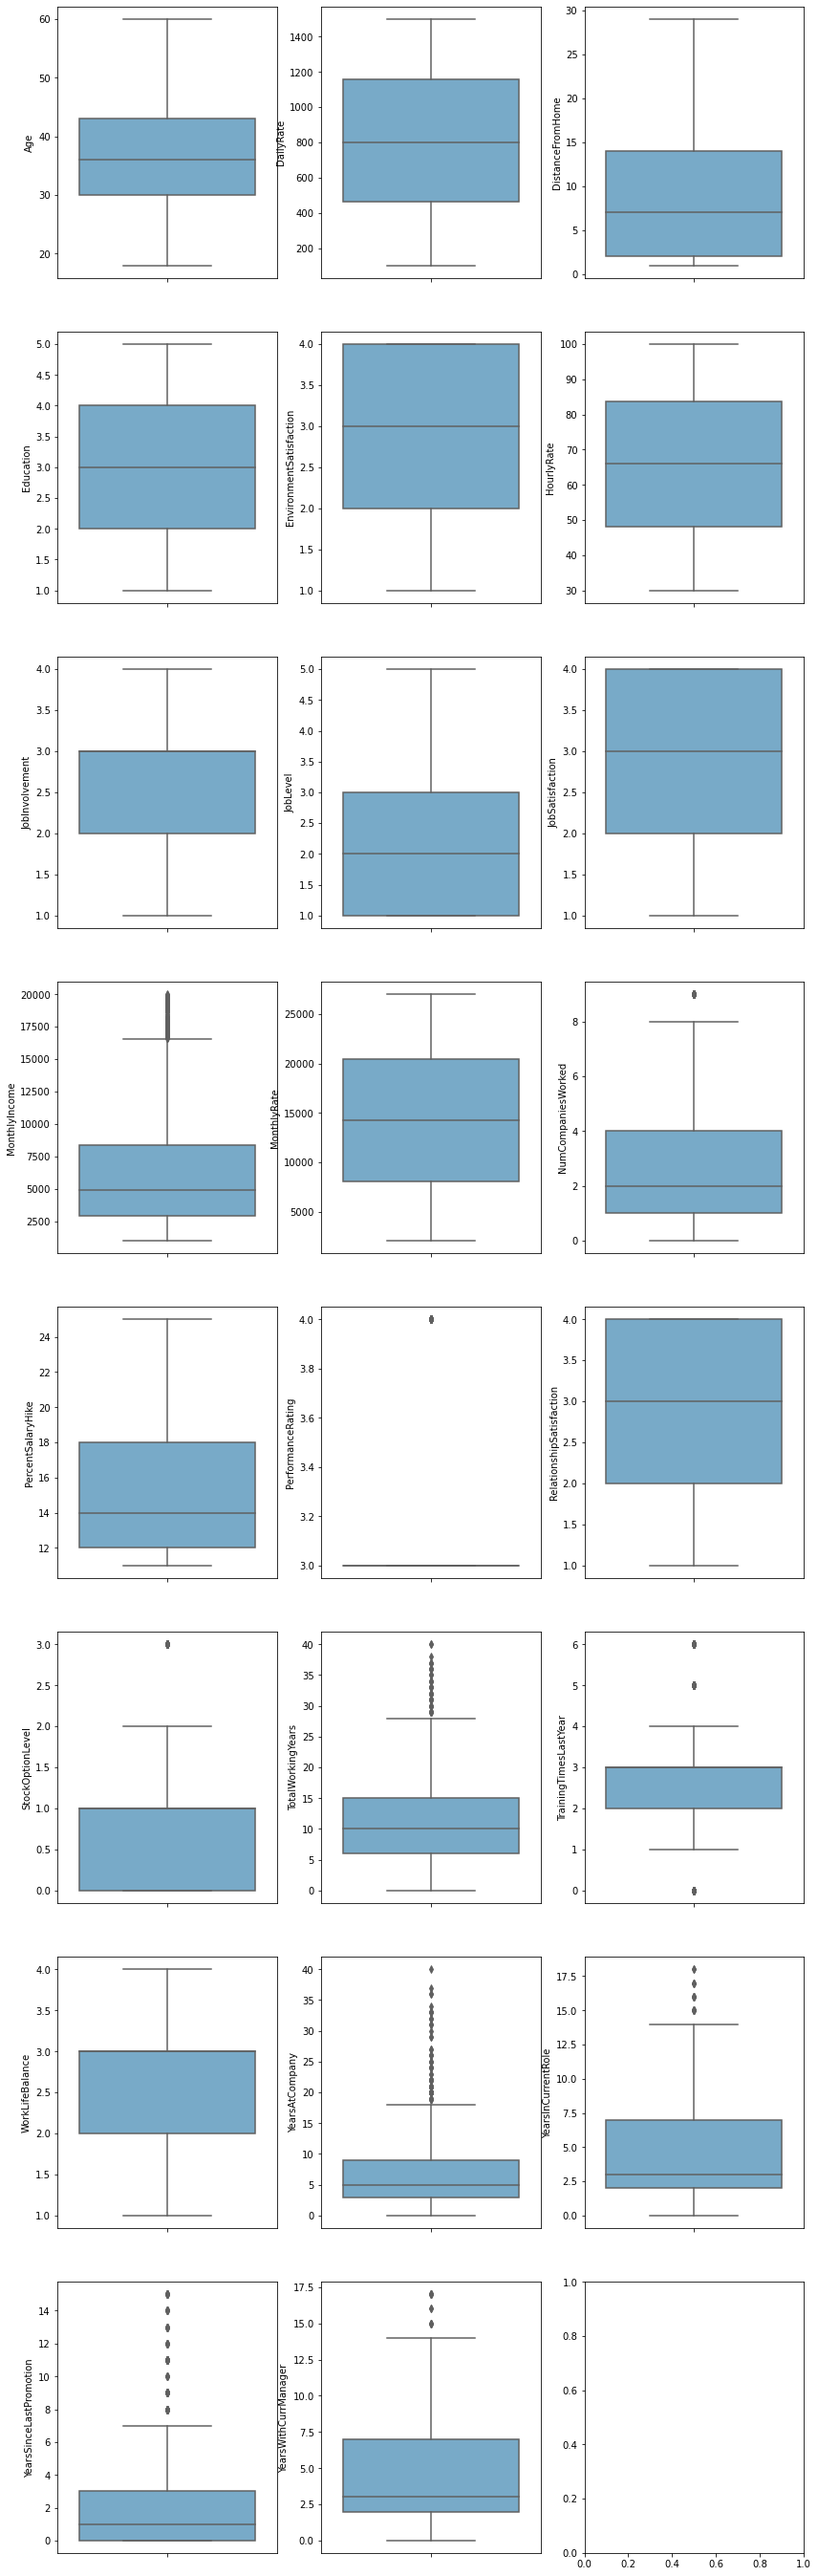

In [23]:
# Using subplots to analize data
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(14,49))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Blues")
    index += 1
plt.show()

From the above boxplot we have many columns having outliers they need to be treated well

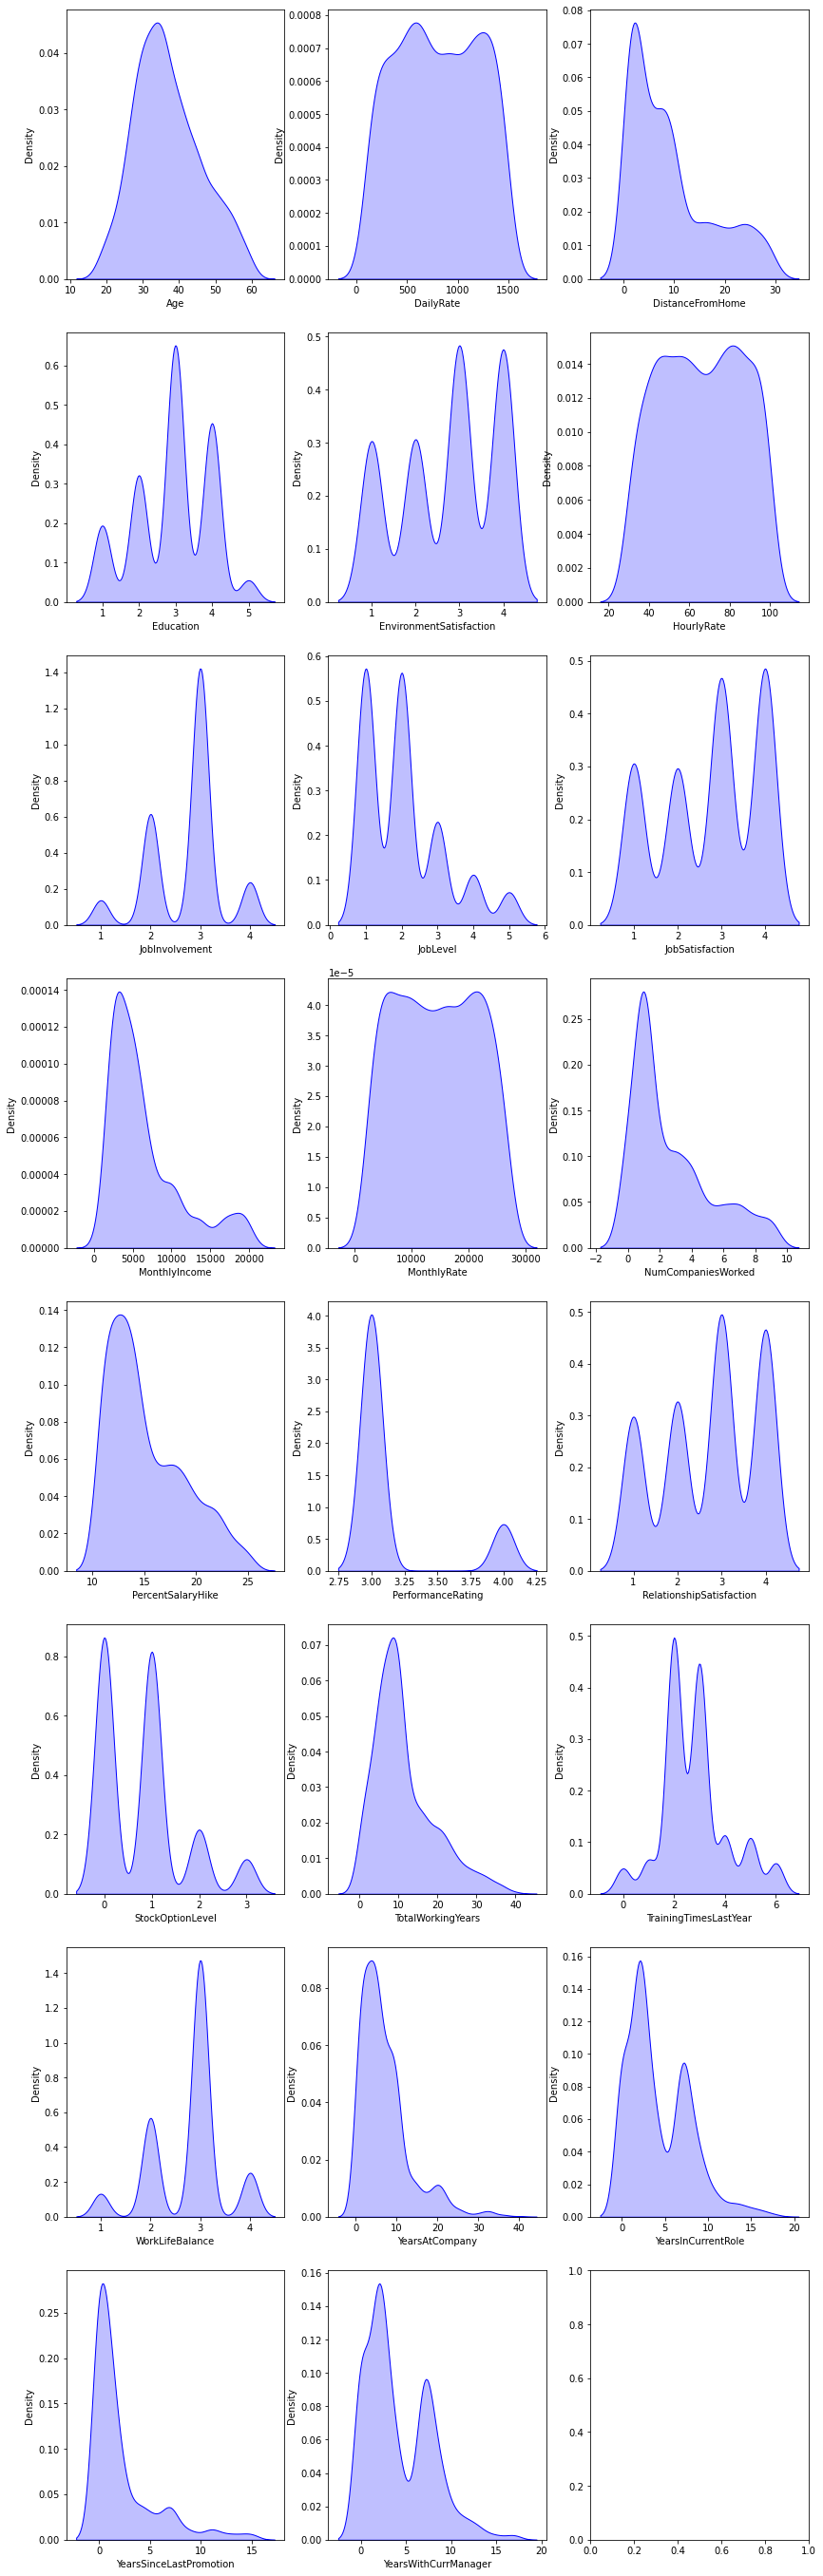

In [24]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(14,49))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.show()

from the above distplot method we have seen that there is some skewness present.

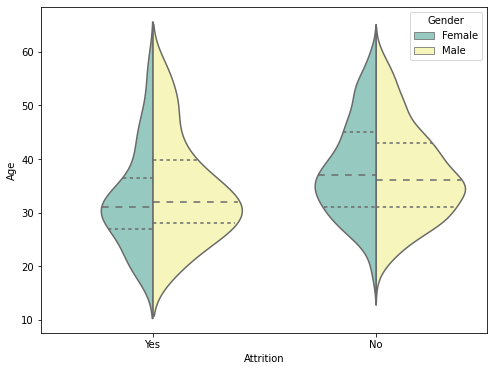

In [25]:
# Using Viloin plot
plt.figure(figsize=(8,6))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
               palette="Set3", split=True, scale="count", inner="quartile")
plt.show()

from the above plot we can see that both male and female has wide range in age between 20 and 30.

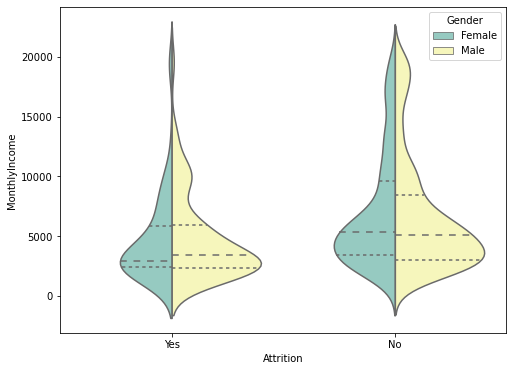

In [26]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, 
               palette="Set3", split=True, scale="count", inner="quartile")
plt.show()

from above plot we can see that most of male and female are having Monthlyincome less than 5000

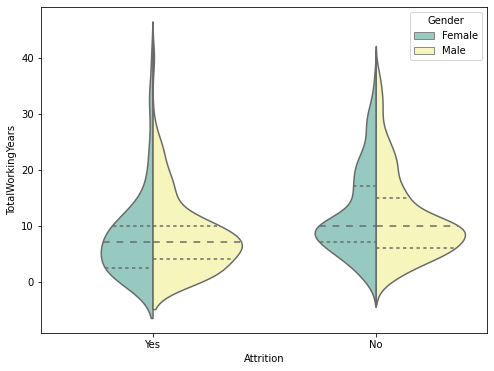

In [27]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
               palette="Set3", split=True, scale="count", inner="quartile")
plt.show()

from the above plot we can see that male and female mostly have Totlaworkexperienve in between range 0 to 10 years

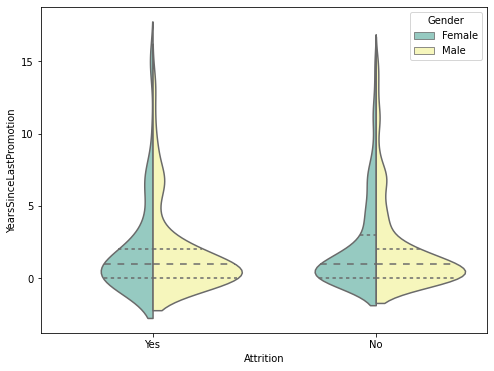

In [28]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, 
               palette="Set3", split=True, scale="count", inner="quartile")
plt.show()

From the above plot we can observe that for both male and female mostly are less than 5 years since they have got promoted.

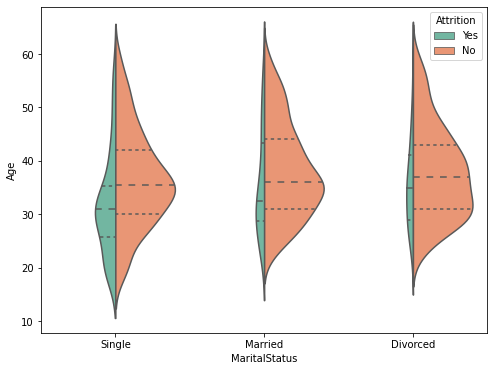

In [29]:
plt.figure(figsize=(8,6))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In this plot we can see that there is some Attrition when you are single and less when you are married but little when you are divorced.

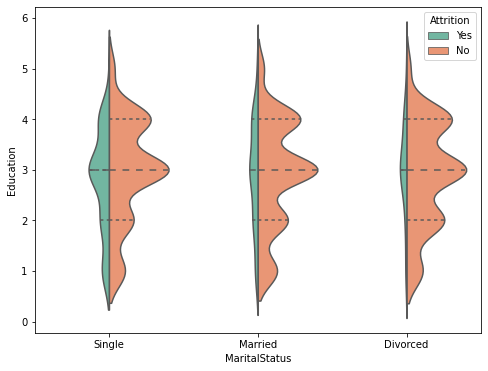

In [30]:
plt.figure(figsize=(8,6))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

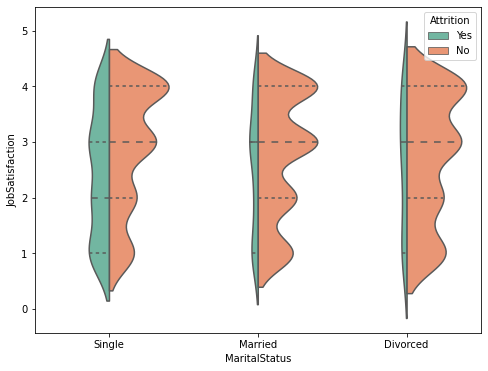

In [31]:
plt.figure(figsize=(8,6))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

above plot shows singles are more satisfied with their job other than they are married or divorced.

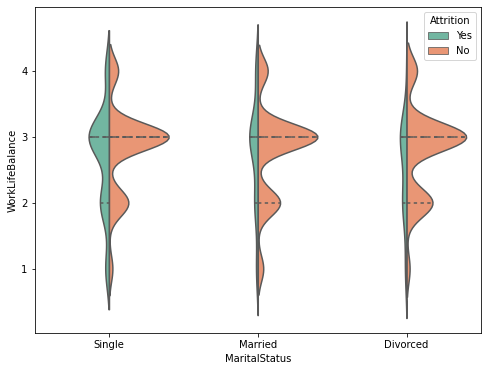

In [32]:
plt.figure(figsize=(8,6))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

From the above graph we can see that worklife of single is much balanced than married or divorced.

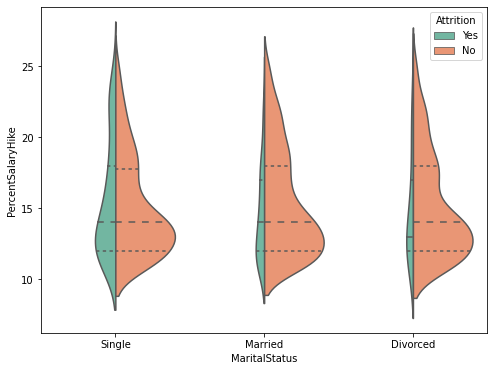

In [33]:
plt.figure(figsize=(8,6))
sns.violinplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

From the above plot we can say that the hike in salary of single is higher than married or some one who got divorced. Perhaps singles have less burden so their work is more effectiove so they get more hike in their salary.

# Encoding categorical object datatype columns

In [34]:
#Importin libraries
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])

df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

i have used LabelEncoder to the Attrition that is our target column as it was object datatype we converted into integer64 type.

In [35]:
# Importing OrdinalEncorder

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = oe.fit_transform(df['OverTime'].values.reshape(-1,1))

i have used Ordinal Encoder in order to convert few columns from object datatype to integer datatype.

In [36]:
#Checking the rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


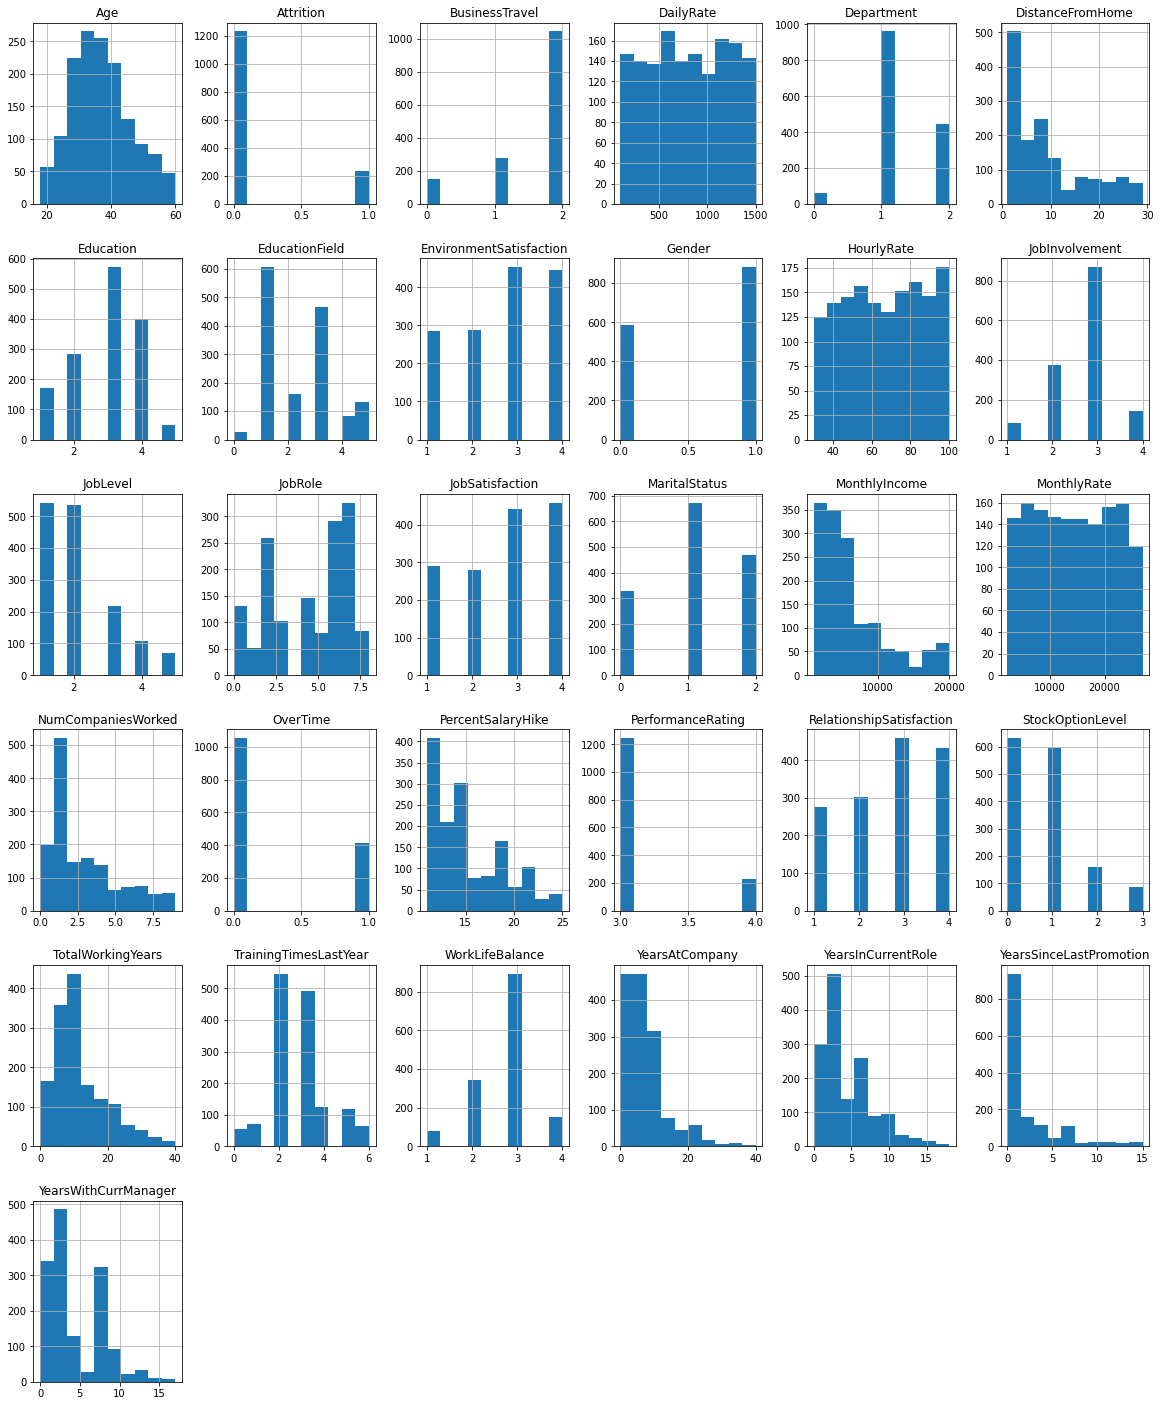

In [37]:
#Using Histogram to analyse the dataframe
df.hist(figsize=(20,25))
plt.show()

Using the above histogram we are able to plot all the columns of are dataset post application of encoding technique where we do not have any object datatype columns anymore.

# Correlation: Using Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together. 
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

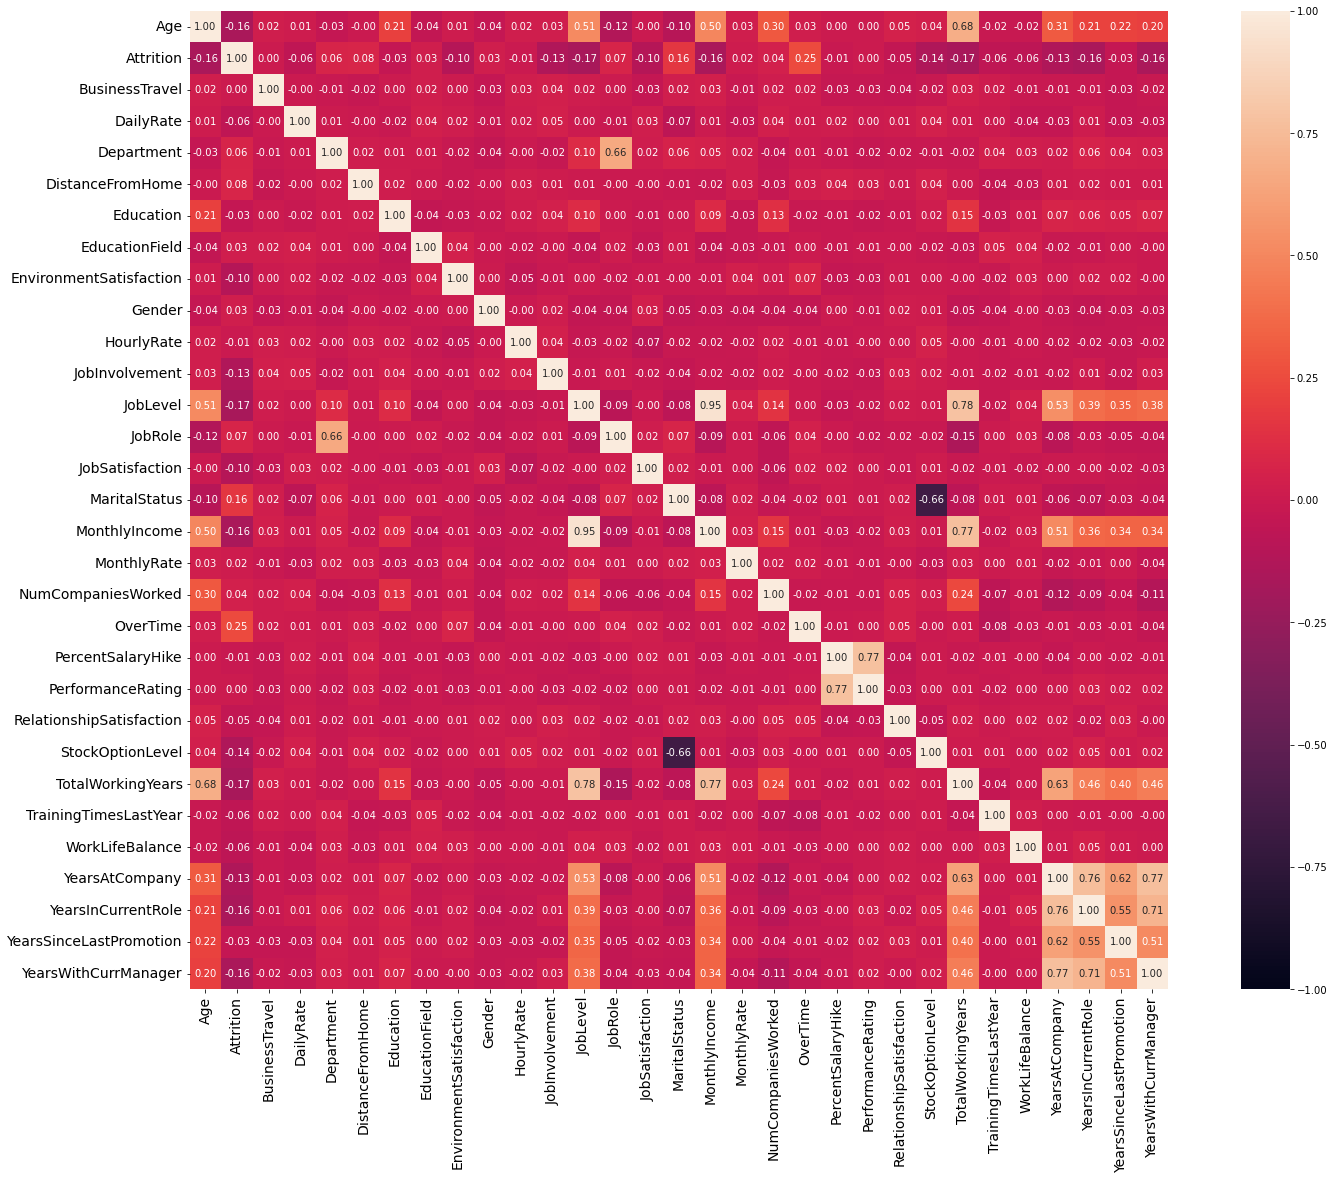

In [38]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In the above heatmap we can see that the target label "Attrition" has both positive and negative correlations with the feature columns.

# Correlation: Using Bar Plot 

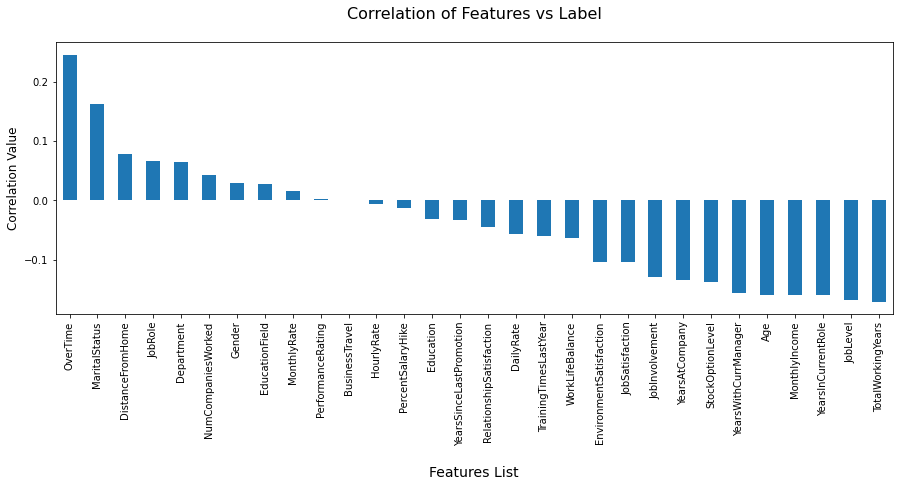

In [39]:
# Using barplot
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In the above Bar Plot we are able to clearly define the feature columns that are positively correlated with our label and the feature columns that are negatively correlated with our label.

# Using Z Score to remove outliers|

In [40]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

# reassigning the changed dataframe name to our original dataframe name
df=df1.copy()

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


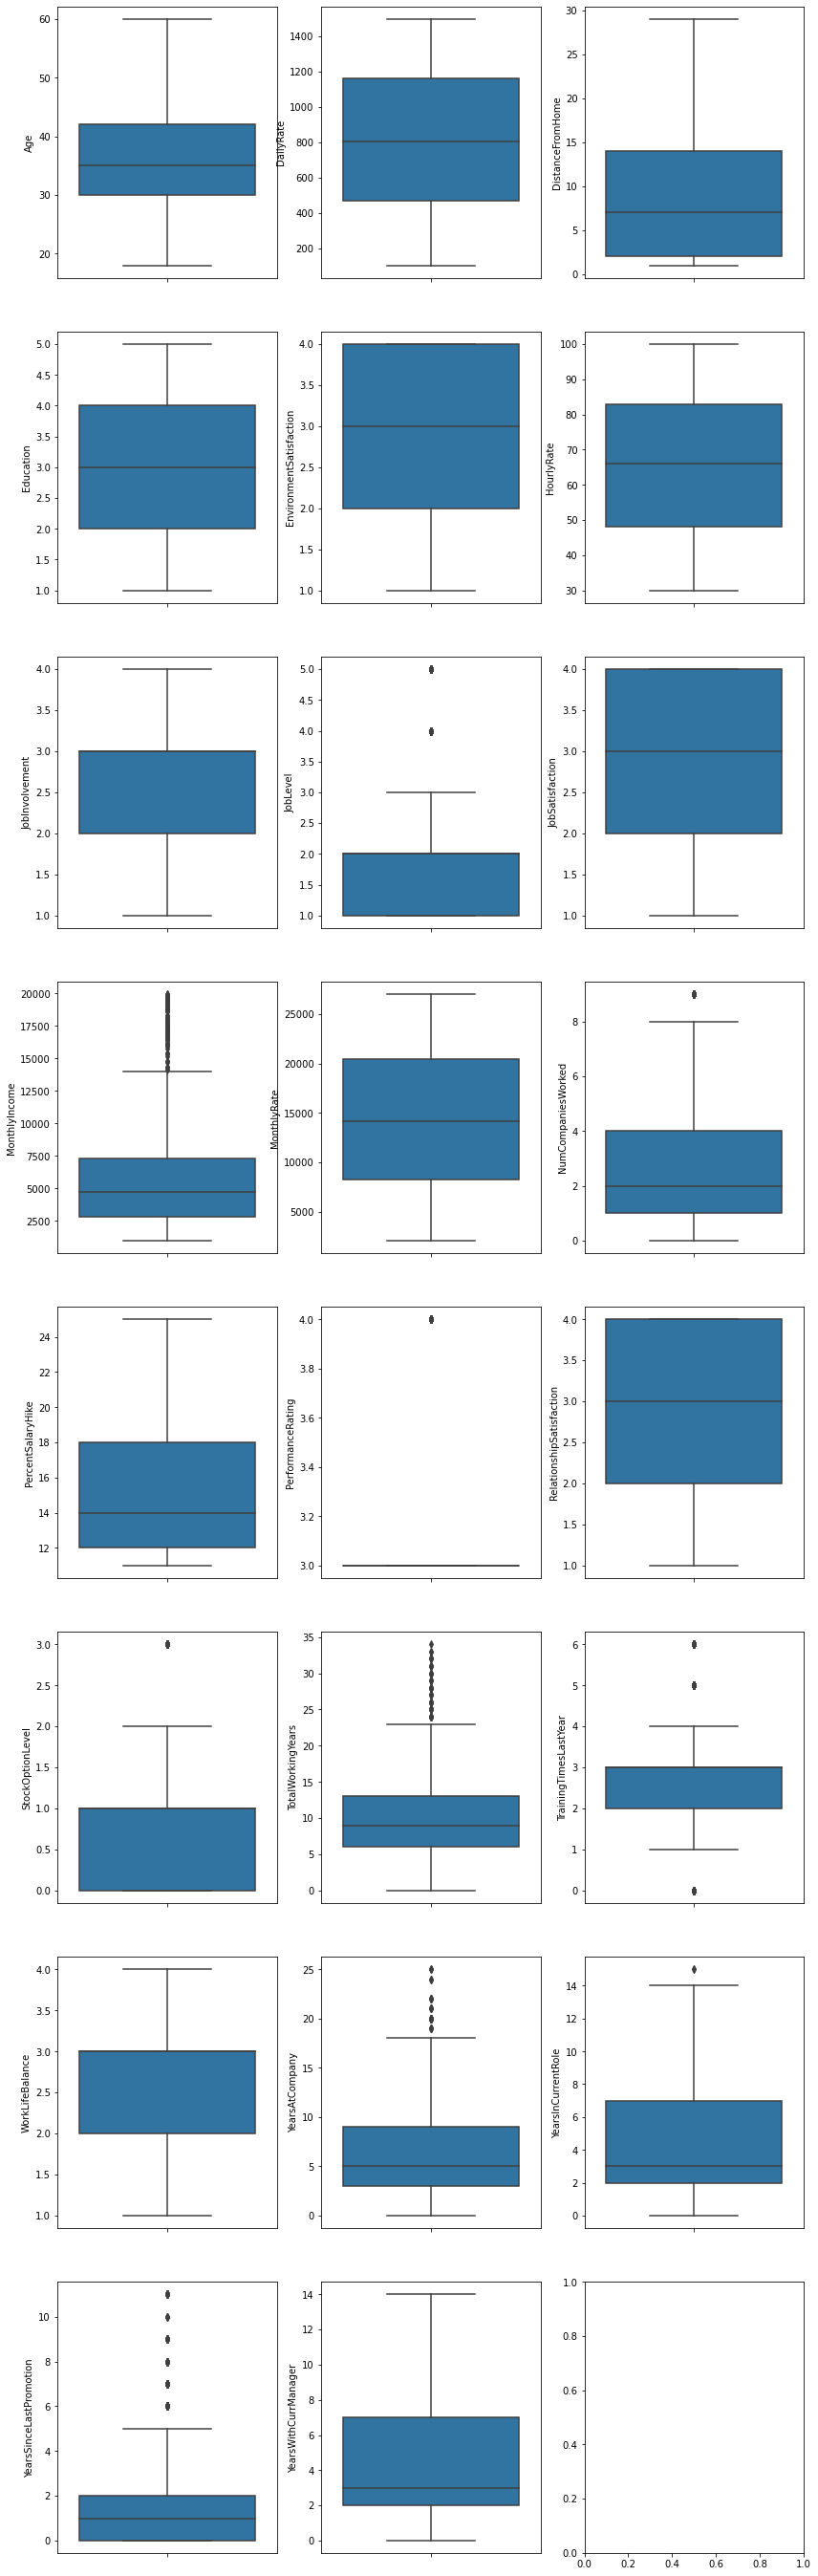

In [41]:
#Using subplots to analyse the data
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(14,49))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.show()

In the above boxplot we can see that the outliers we could have afforded to lose from our numerical columns we have gotten rid of it. There are still presence of outliers but since they are in continous format we shall ignore it.

In [42]:
#Analysing the skewness present in the dataset
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

# Using Log Transform to fix skewness

In [43]:
for col in integer_datatypes:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical integer datatype columns to ensure that we do not have skewness in our dataset.

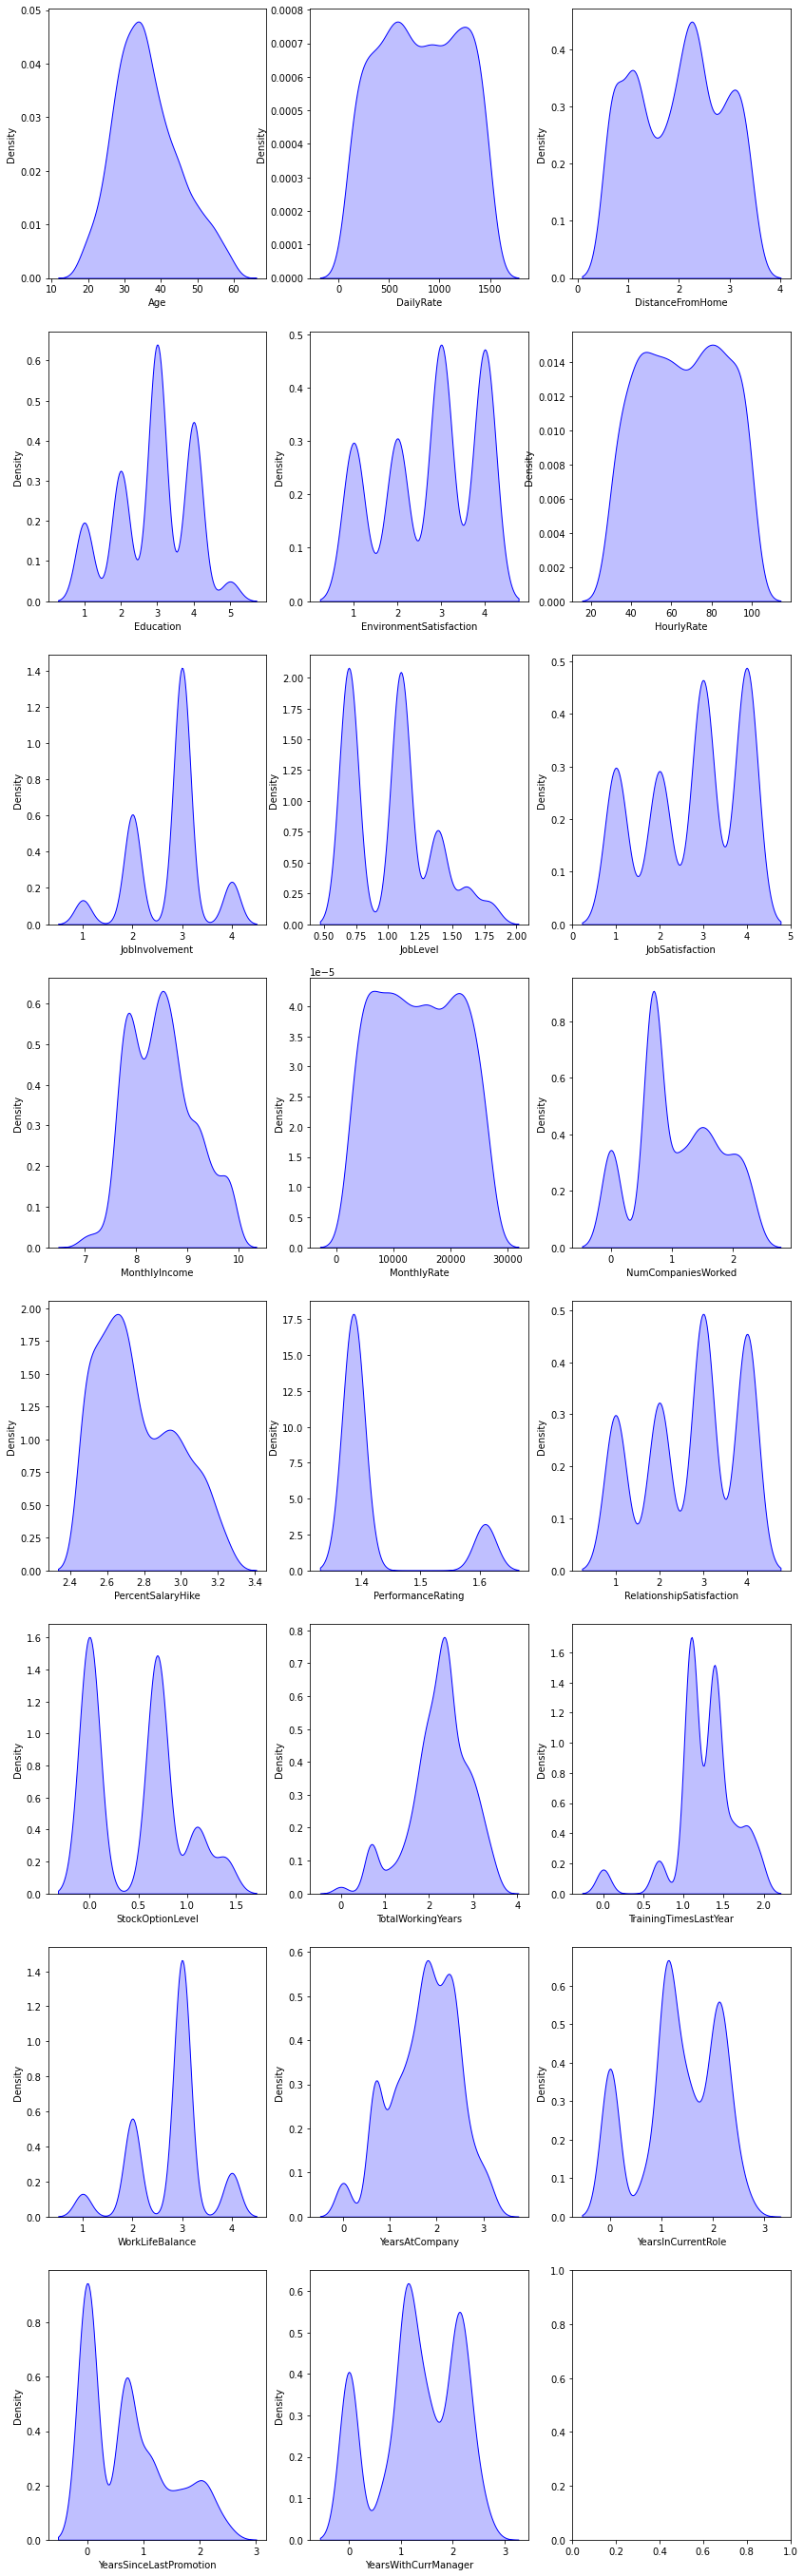

In [44]:
#Using subplots 
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(14,49))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [45]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column

# Resolving the class imbalance issue in label column

In [46]:
Y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [53]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

# Feature Scaling

In [55]:
#importing libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.747106,0.661591,0.852414,1.427184,-1.692303,-0.747860,-1.008749,-0.438271,-1.357405,1.509941,...,-0.473958,-1.417514,-0.941838,0.162823,-3.390665,-2.176803,0.504874,0.565737,-1.010540,0.839063
1,1.688059,-0.995409,-1.273386,-0.562985,0.201323,-1.773952,-1.008749,0.488702,0.846720,-0.253641,...,2.489422,1.438892,0.680928,0.459875,0.380267,0.545376,1.164945,1.201150,-0.008387,1.214752
2,0.276629,0.661591,1.552404,-0.562985,-1.181824,-0.747860,1.367205,1.415674,0.846720,1.403057,...,-0.473958,-0.465379,-0.941838,-0.011531,0.380267,0.545376,-2.336896,-1.610117,-1.010540,-1.500826
3,-0.193848,-0.995409,1.601481,-0.562985,-0.819634,1.304324,-1.008749,1.415674,-1.357405,-0.520851,...,-0.473958,0.486757,-0.941838,0.162823,0.380267,0.545376,0.871889,1.201150,0.993767,-1.500826
4,-0.899564,0.661591,-0.467493,-0.562985,-1.181824,-1.773952,0.575221,-1.365243,0.846720,-1.375921,...,-0.473958,1.438892,0.680928,-0.209197,0.380267,0.545376,-0.732503,-0.124866,0.577836,-0.066129


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building Regression Models

In [60]:
#Importing the required liberaries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 88.94645941278065 on Random State 753


# Creating the training and testing data sets

In [61]:
#creating datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=526)

I am taking 25 percent of the complete dataset for training purpose and the remaing 75 percent with be used to train the machine learning models using the random state as 759.

# Machine Learning Model for Classification with Evaluation Metrics

In [62]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=526)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [65]:
# Logistic Regression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 84.4559585492228

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       295
           1       0.82      0.88      0.85       284

    accuracy                           0.84       579
   macro avg       0.85      0.85      0.84       579
weighted avg       0.85      0.84      0.84       579

Cross Validation Score: 85.40980859462279

Accuracy Score - Cross Validation Score is -0.9538500453999887


In [67]:
# Support Vector Classifier
from sklearn.svm import SVC


model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 90.67357512953367

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       295
           1       0.88      0.93      0.91       284

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579

Cross Validation Score: 90.50802487525135

Accuracy Score - Cross Validation Score is 0.16555025428232284


In [69]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 82.21070811744386

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       295
           1       0.78      0.90      0.83       284

    accuracy                           0.82       579
   macro avg       0.83      0.82      0.82       579
weighted avg       0.83      0.82      0.82       579

Cross Validation Score: 82.78012586579283

Accuracy Score - Cross Validation Score is -0.5694177483489682


In [71]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 93.09153713298791

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       295
           1       0.94      0.92      0.93       284

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579

Cross Validation Score: 90.85787964549044

Accuracy Score - Cross Validation Score is 2.2336574874974673


In [73]:
# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 76.16580310880829

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.56      0.70       295
           1       0.68      0.98      0.80       284

    accuracy                           0.76       579
   macro avg       0.82      0.77      0.75       579
weighted avg       0.82      0.76      0.75       579

Cross Validation Score: 79.10311313025993

Accuracy Score - Cross Validation Score is -2.937310021451637


In [75]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 94.99136442141624

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       295
           1       0.94      0.96      0.95       284

    accuracy                           0.95       579
   macro avg       0.95      0.95      0.95       579
weighted avg       0.95      0.95      0.95       579

Cross Validation Score: 93.40033142176212

Accuracy Score - Cross Validation Score is 1.591032999654118


# Hyper parameter tuning on the best classification ML model

In [82]:
#choosing Extra Tree Classifier
f_mod={'n_estimators':[20,40,60,80,100],'criterion':['gini','entropy'],'min_samples_split':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}

In [84]:
#importing gridsearch liberary
from sklearn.model_selection import GridSearchCV
GSCV=GridSearchCV(ExtraTreesClassifier(),f_mod,cv=5)

In [85]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [20, 40, 60, 80, 100]})

In [86]:
print(GSCV.best_score_)
print(GSCV.best_params_)

0.9424227367584219
{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 80}


In [89]:
Final_Model= ExtraTreesClassifier(criterion='gini',max_features='log2',min_samples_split=3,n_estimators=100)
classifier=Final_Model.fit(X_train,Y_train)
fmod_pred=Final_Model.predict(X_test)
accuracy_score=print('accuracy_score=',fmod_accuracy)

accuracy_score= 94.47322970639033


# AUC ROC Curve

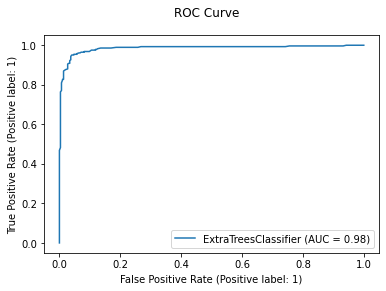

In [90]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()